In [2]:
import numpy as np
import pandas as pd
from data import constants
from mathutil import comp, percentage
from plotutil import periodictable

In [3]:
df = pd.read_excel(r"C:\Users\jenso\PowerFolders\Forschung\CSD Data Mining\Results.xlsx")
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
cr_bro = pd.read_excel(r"C:\Users\jenso\PowerFolders\Forschung\CSD Data Mining - Chromyl\Results.xlsx")
df = pd.concat([df, cr_bro])

df["Group"] = df["Group"].astype(str)
dataset = df.loc[(df["Type"] == "Corrole") & (df["Class"] == "Corrole")]
# dataset = df.loc[(df["Type"] != "Porphyrin")]
dataset.reset_index(drop=True, inplace=True)
dataset = percentage.createPercData(dataset)
dataset = comp.createCompData(dataset)
dataset = percentage.createCompPercData(dataset)
# dataset["dominant"] = dataset[constants.compColumns].idxmax(axis=1)
len(dataset)

c:\Users\jenso\Documents\Projects\porphystruct-scripts\mathutil\percentage.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col + "%"] = df[col].abs()/sum
c:\Users\jenso\Documents\Projects\porphystruct-scripts\mathutil\comp.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col + " comp"] = __compValue(df[col+"1"], df[col + "2"])
c:\Users\jenso\Documents\Projects\porphystruct-scripts\mathutil\percentage.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

872

In [4]:
from matplotlib import pyplot as plt
from plotutil.misc import cm_to_inch
import matplotlib
! pip install SciencePlots

In [5]:
plt.style.use(['science', 'nature', 'no-latex'])
plt.rcParams["figure.figsize"] = (cm_to_inch(16), cm_to_inch(13))
plt.rcParams["figure.dpi"] = 1200
plt.rcParams["axes.labelsize"] = 11
plt.rcParams["axes.titlesize"] = 9
plt.rcParams["xtick.labelsize"] = 9
plt.rcParams["ytick.labelsize"] = 9
plt.rcParams["font.family"] = "Arial"

In [6]:
! pip install plotnine
! pip install natsort
! pip install -U kaleido
! pip install plotly

import plotly.express as px
from natsort import index_natsorted
import plotly.express as px
from plotnine import *
import plotly.io as pio
import plotly
plotly.__version__ #5.6.0
import kaleido #required
kaleido.__version__ #0.2.1
from plotutil import ridgeline

C:\Users\jenso\AppData\Local\Temp/ipykernel_16360/1553281435.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jenso\AppData\Local\Temp/ipykernel_16360/1553281435.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\jenso\Documents\Projects\porphystruct-scripts\plotutil\ridgeline.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


(<Figure size 7559.06x6141.73 with 1 Axes>, [<AxesSubplot:>])

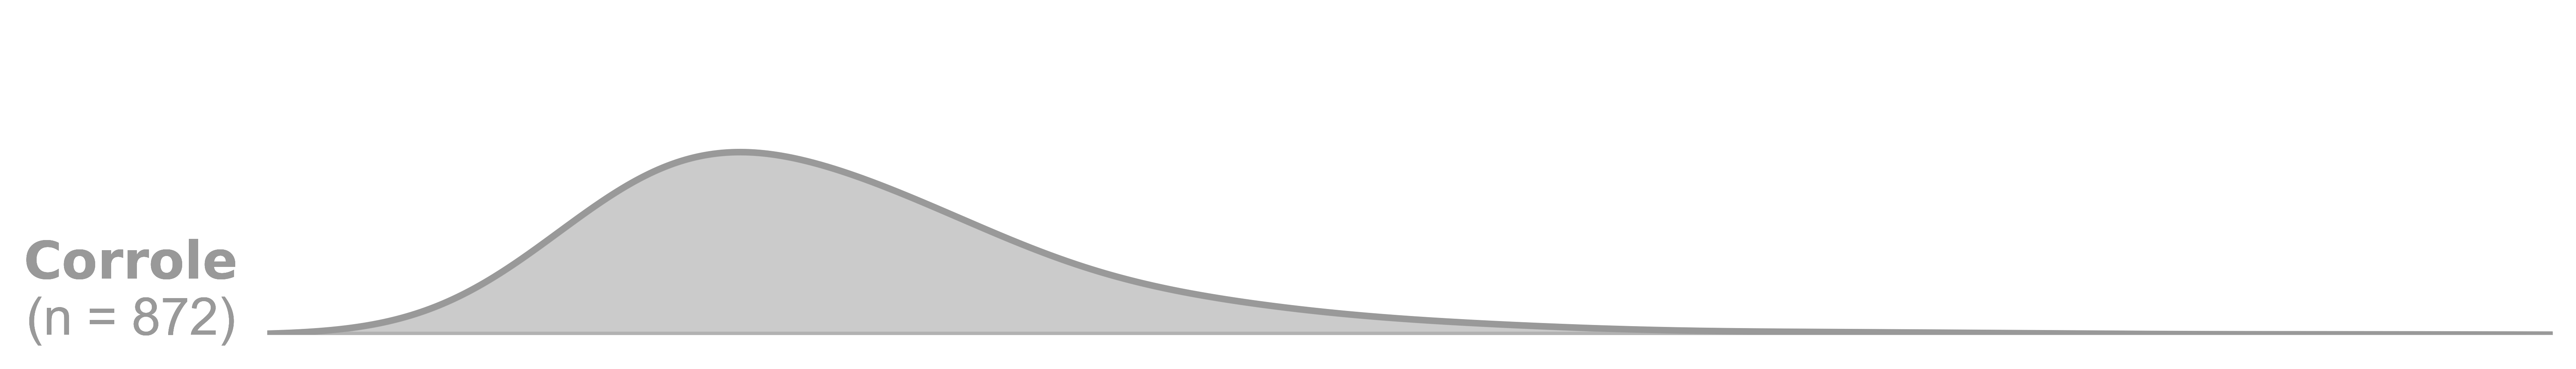

In [7]:
mode = "Ruffling"
dataset["x"] = np.abs(dataset[f"{mode}1"])
dataset["y"] = np.sign(dataset[f"{mode}1"]) * dataset[f"{mode}2"]
ridgeline.plot(dataset, constants.classlist, "Class", "x", f"|{mode}1| /Å", (-.2, 1.25), (0,5), constants.colors_classes, .075)

C:\Users\jenso\AppData\Local\Temp/ipykernel_16360/139746563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\jenso\Documents\Projects\porphystruct-scripts\plotutil\ridgeline.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


(<Figure size 7559.06x6141.73 with 1 Axes>, [<AxesSubplot:>])

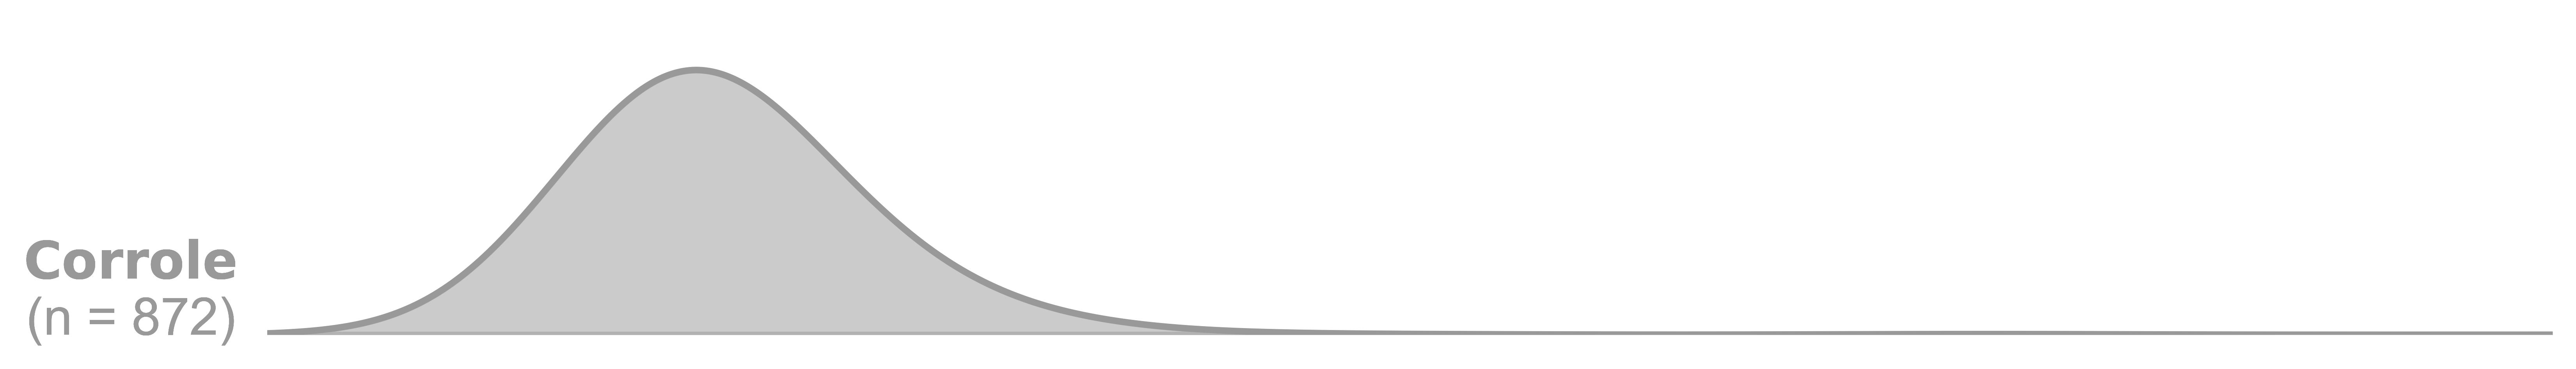

In [8]:
mode = "WavingY"
dataset["x"] = np.abs(dataset[f"{mode} comp"])
ridgeline.plot(dataset, constants.classlist, "Class", "x", f"|{mode}| /Å", (-.2, 1.25), (0,5), constants.colors_classes, .075)

In [9]:
from data import datautil


data_hic = datautil.applyHICSubclass(dataset)
data_hic = data_hic.loc[~data_hic["Subclass"].isin(["Nope", "sonstige Isocorrole"])]
classes = ["Corrole", "Heterocorrole", "Isocorrole", "Corrolazine", "NR-Corrole", "NConfused-Corrole"]
hic_sub = ["N-Heterocorrole", "10-Heterocorrole", "Corrolazine", "5-Isocorrole", "10-Isocorrole"]#, "sonstige Isocorrole"]
ridgeline.plot(data_hic, hic_sub, "Subclass", "DoopExp", constants.doop_axis_label, (-.1,2), (0,4), constants.colors_min + constants.colors_ext + constants.colors_additional)


c:\Users\jenso\Documents\Projects\porphystruct-scripts\data\datautil.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(<Figure size 7559.06x6141.73 with 0 Axes>, [])

<Figure size 7559.06x6141.73 with 0 Axes>

C:\Users\jenso\AppData\Local\Temp/ipykernel_16360/2808470539.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jenso\AppData\Local\Temp/ipykernel_16360/2808470539.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

172


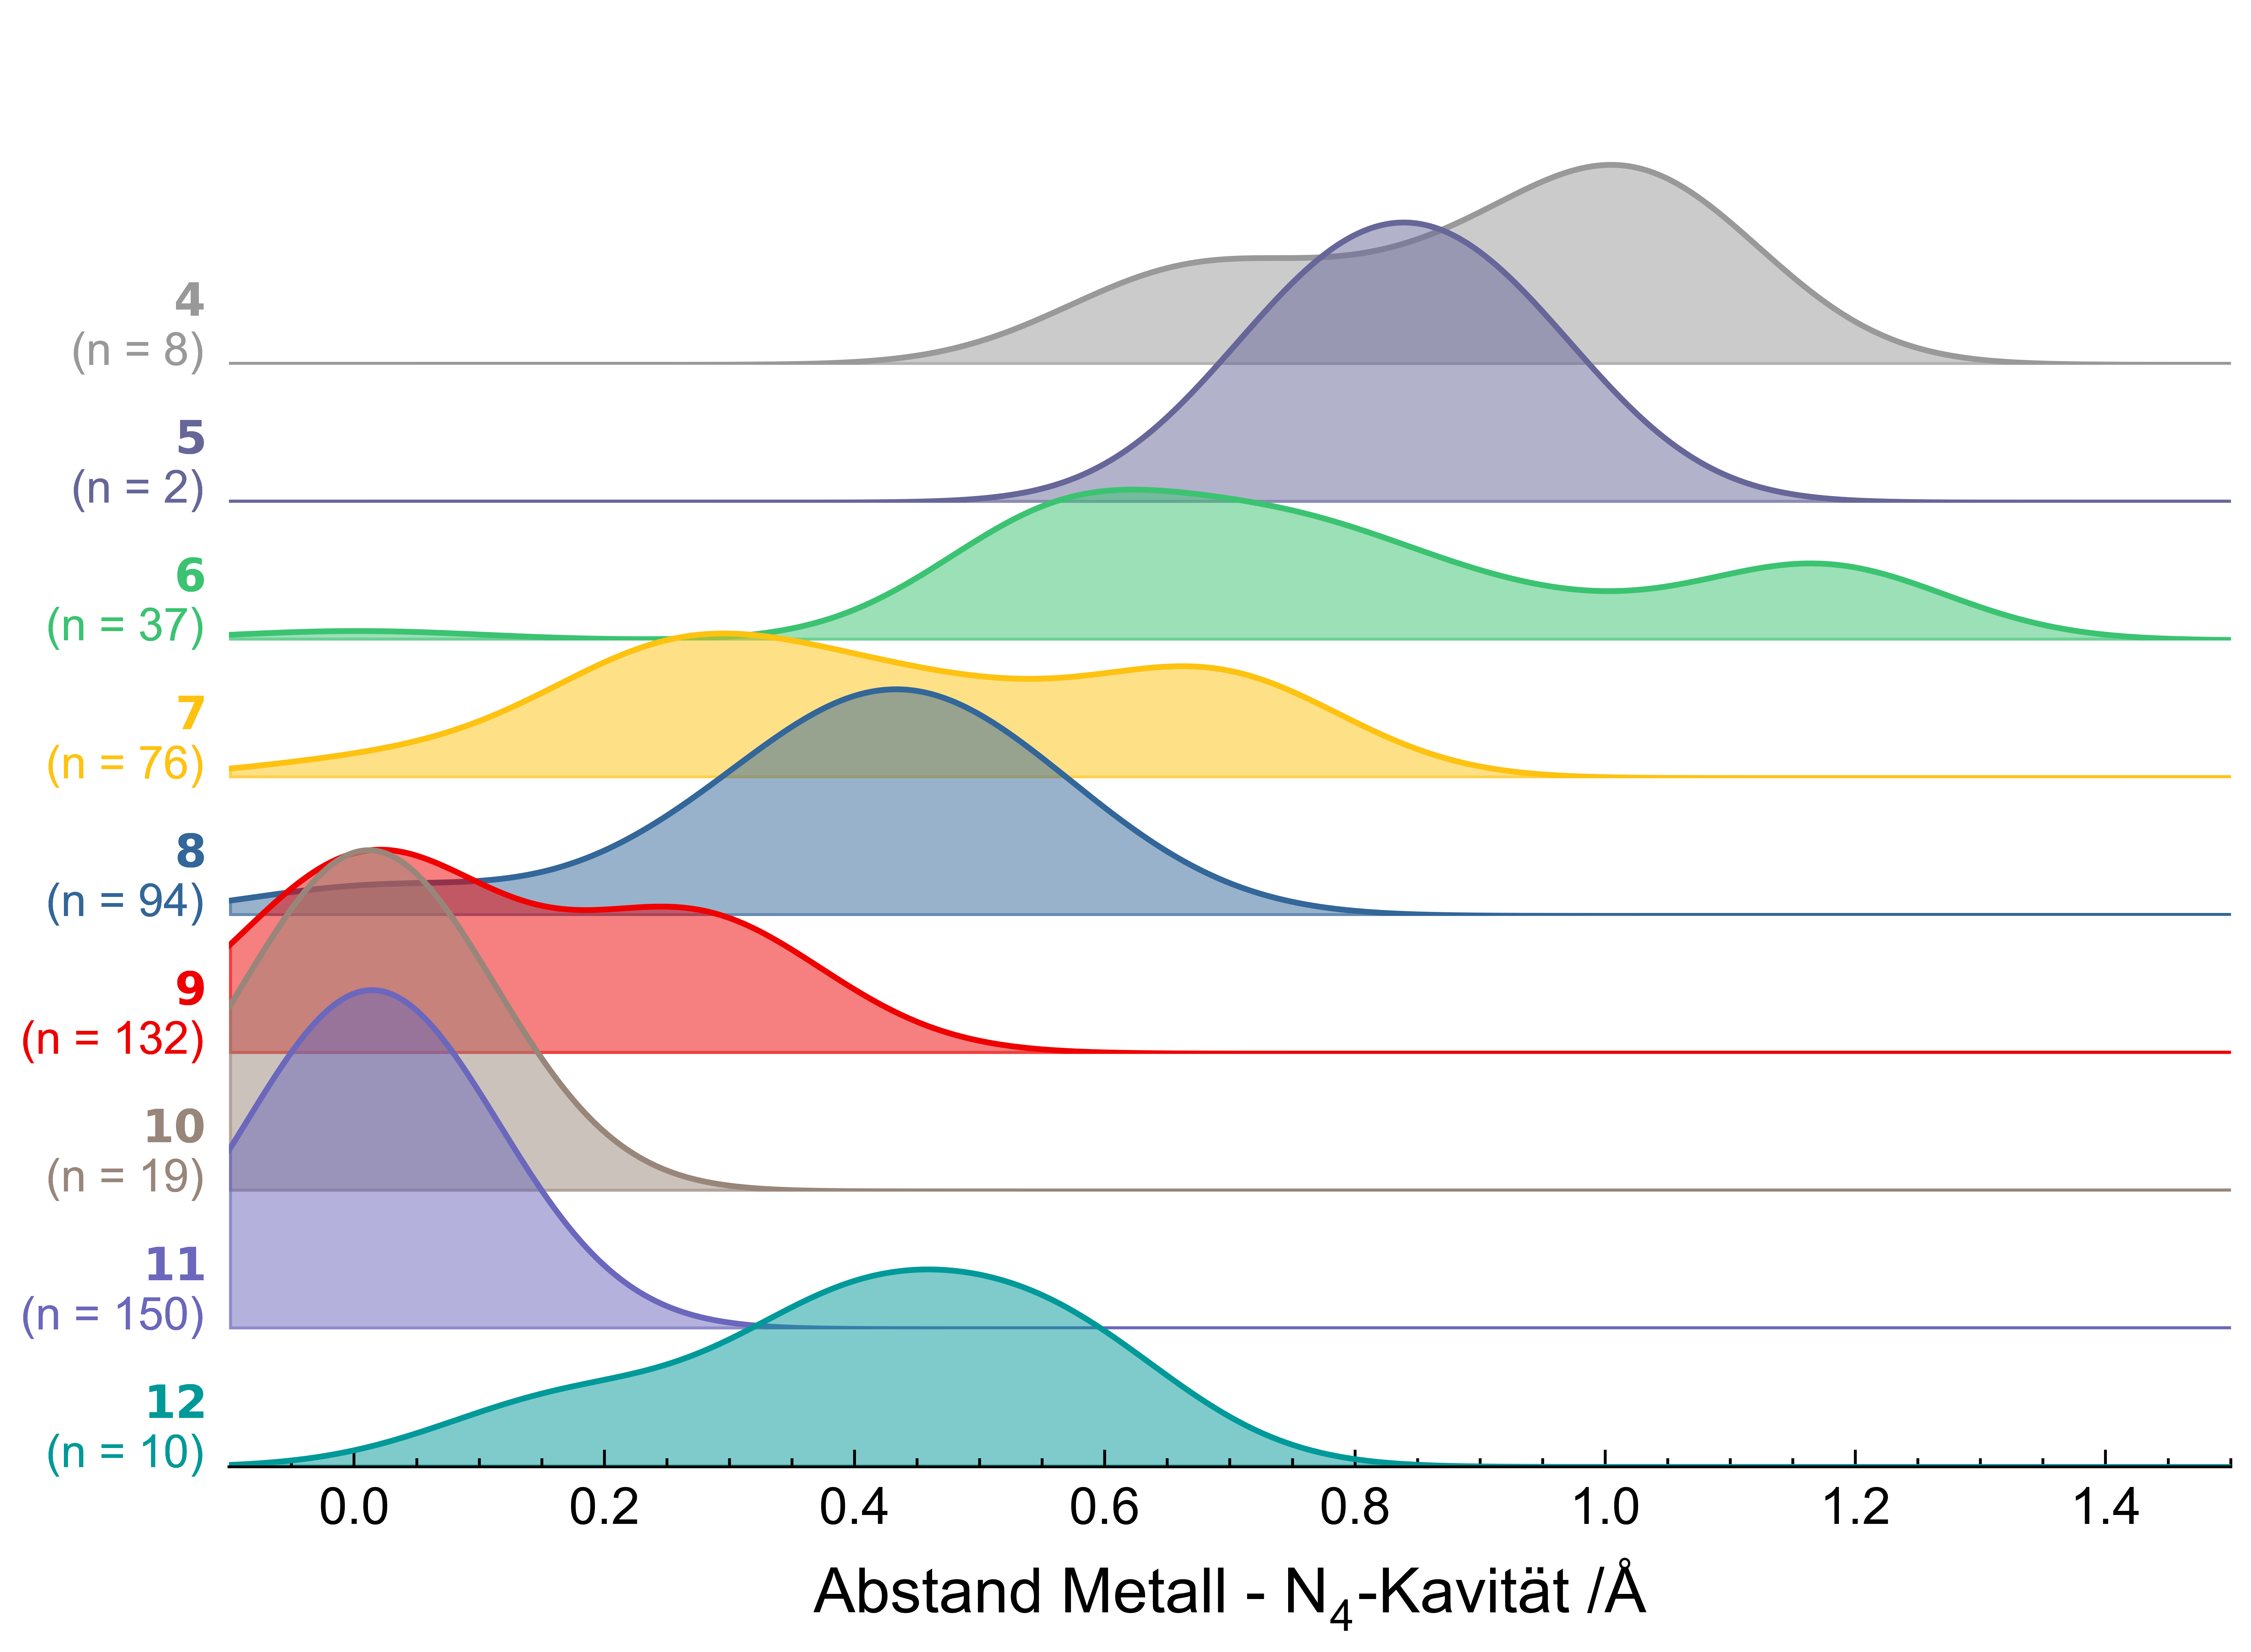

In [10]:
mode = "Doming"
dataset["y"] = dataset[mode+"2"] * np.sign(dataset[mode+"1"])
dataset["x"] = np.abs(dataset[mode+"1"]/dataset["DoopExp"])
dataset.fillna(0, inplace=True)
xaxis = f"|{mode.lower()[0:3]} 1| / Å"
m3d = periodictable.m3d.copy()
metals = ["Fe","Mn", "Re", "Ru", "Os"]
groups = ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","Ln"]
# groups = [ "2", "13", "14", "15"]
groups = ["3","4","5","6","7","8","9","10","11","12"]
metals = ["B", "Al", "Ga", "In", "Tl", "Si", "Ge", "Sn", "Pb", "P", "As", "Sb", "Bi"]
coordNo = [4,5,6]
dataset["M2N4"] = np.abs(dataset["MetalToN4"])
#constants.dist_metal_n4
#constants.doop_axis_label
ridgeline.plot(dataset, groups, "Group", "M2N4", constants.dist_metal_n4, (-.1,1.5), (0,4), constants.colors_min + constants.colors_ext + constants.colors_additional)
# len(dataset[dataset["Metal"] == "Cu"])
print(len(dataset.loc[dataset["Metal"].isin(metals)]))

C:\Users\jenso\AppData\Local\Temp/ipykernel_16360/2290510405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\jenso\Documents\Projects\porphystruct-scripts\plotutil\ridgeline.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


(<Figure size 7559.06x6141.73 with 8 Axes>,
 [<AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:xlabel='$\\mathregular{D_{oop}}$ /Å'>])

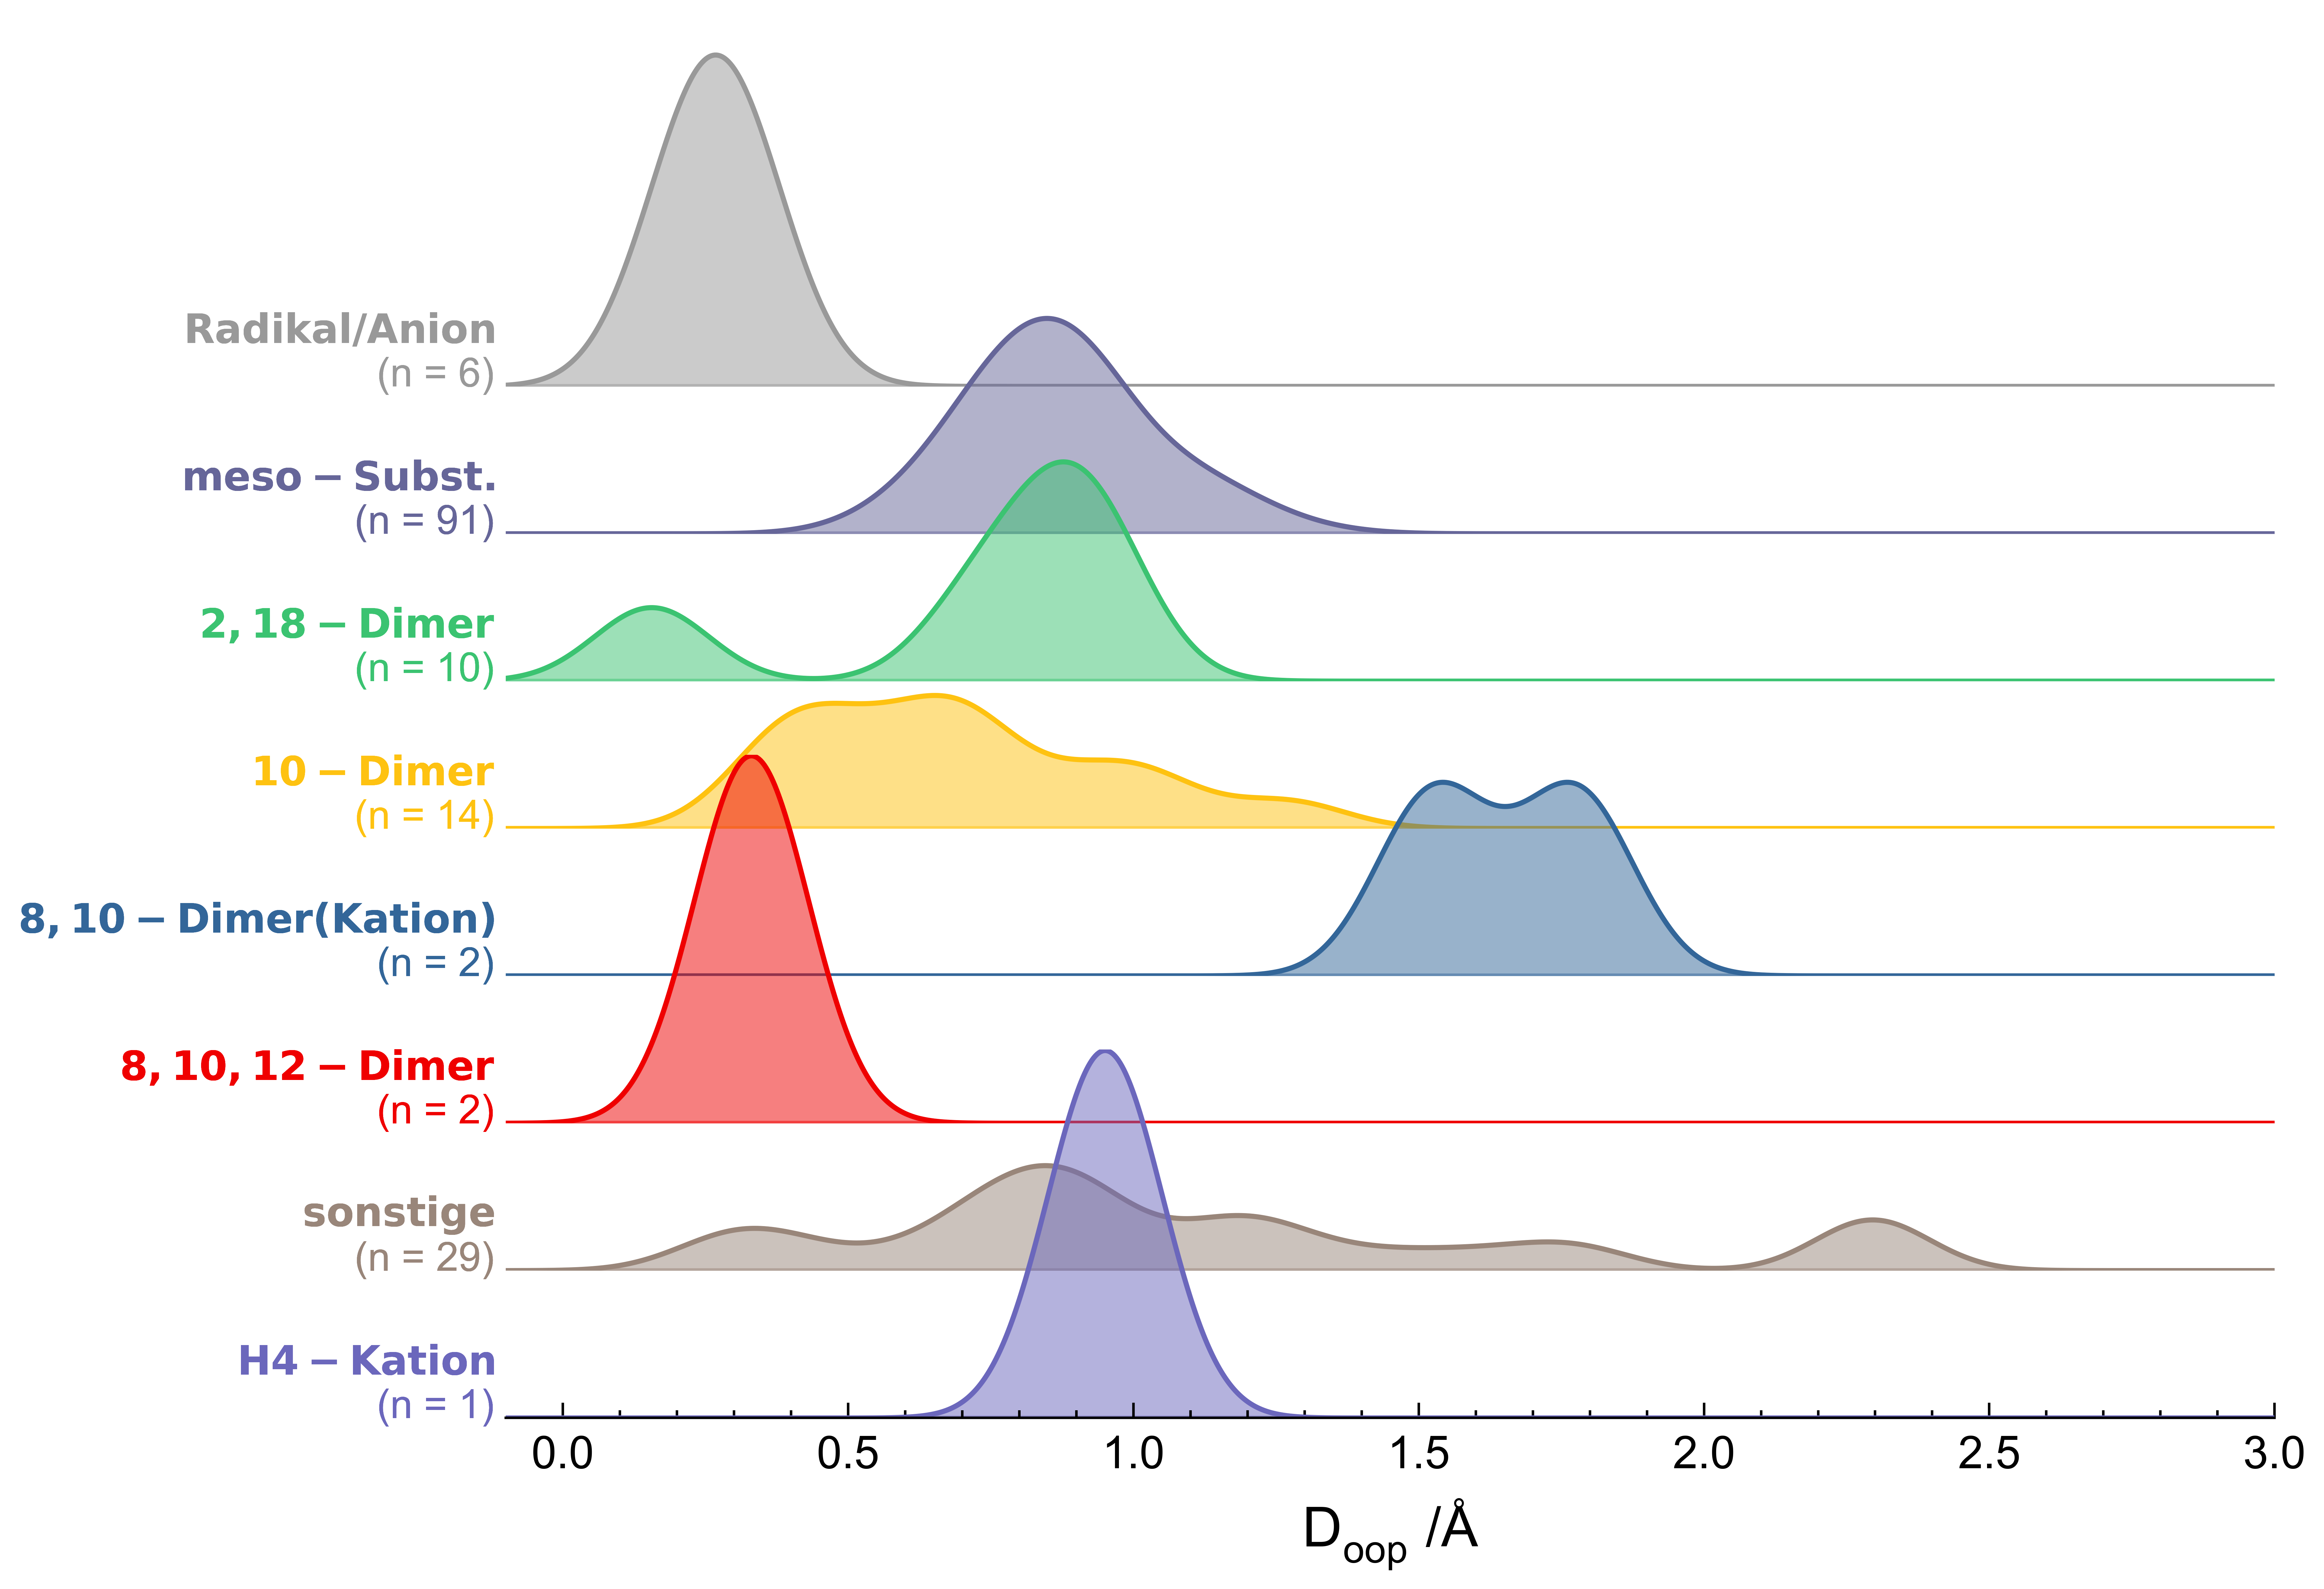

In [14]:
freeBases = dataset.loc[dataset["Metal"] == "H"]
freeBases["Class"] = freeBases.apply(
    lambda x:
        "Radikal/Anion" if x["Ligand"].endswith("-") or x["Ligand"].endswith("*")
        else "8,10-Dimer (Kation)" if x["Ligand"].endswith("8,10-Dimer")
        else "10-Dimer" if x["Ligand"].endswith("10-Dimer")
        else "2,18-Dimer" if x["Ligand"].endswith("2,18-Dimer")
        else "8,10,12-Dimer" if x["Ligand"].endswith("8,10,12-Dimer")
        else "meso-Subst." if x["SubstNo"] == 3
        else "H4-Kation" if x["Ligand"].endswith("+")
        else "sonstige",
    axis=1)

groups = [
        "Radikal/Anion" ,
        "meso-Subst.",
           "2,18-Dimer","10-Dimer","8,10-Dimer (Kation)", "8,10,12-Dimer",
           "sonstige", "H4-Kation"
          ]
ridgeline.plot(freeBases, groups, "Class", "DoopExp", constants.doop_axis_label, (-.1, 3), (0, 4), constants.colors_min + constants.colors_ext + constants.colors_additional)


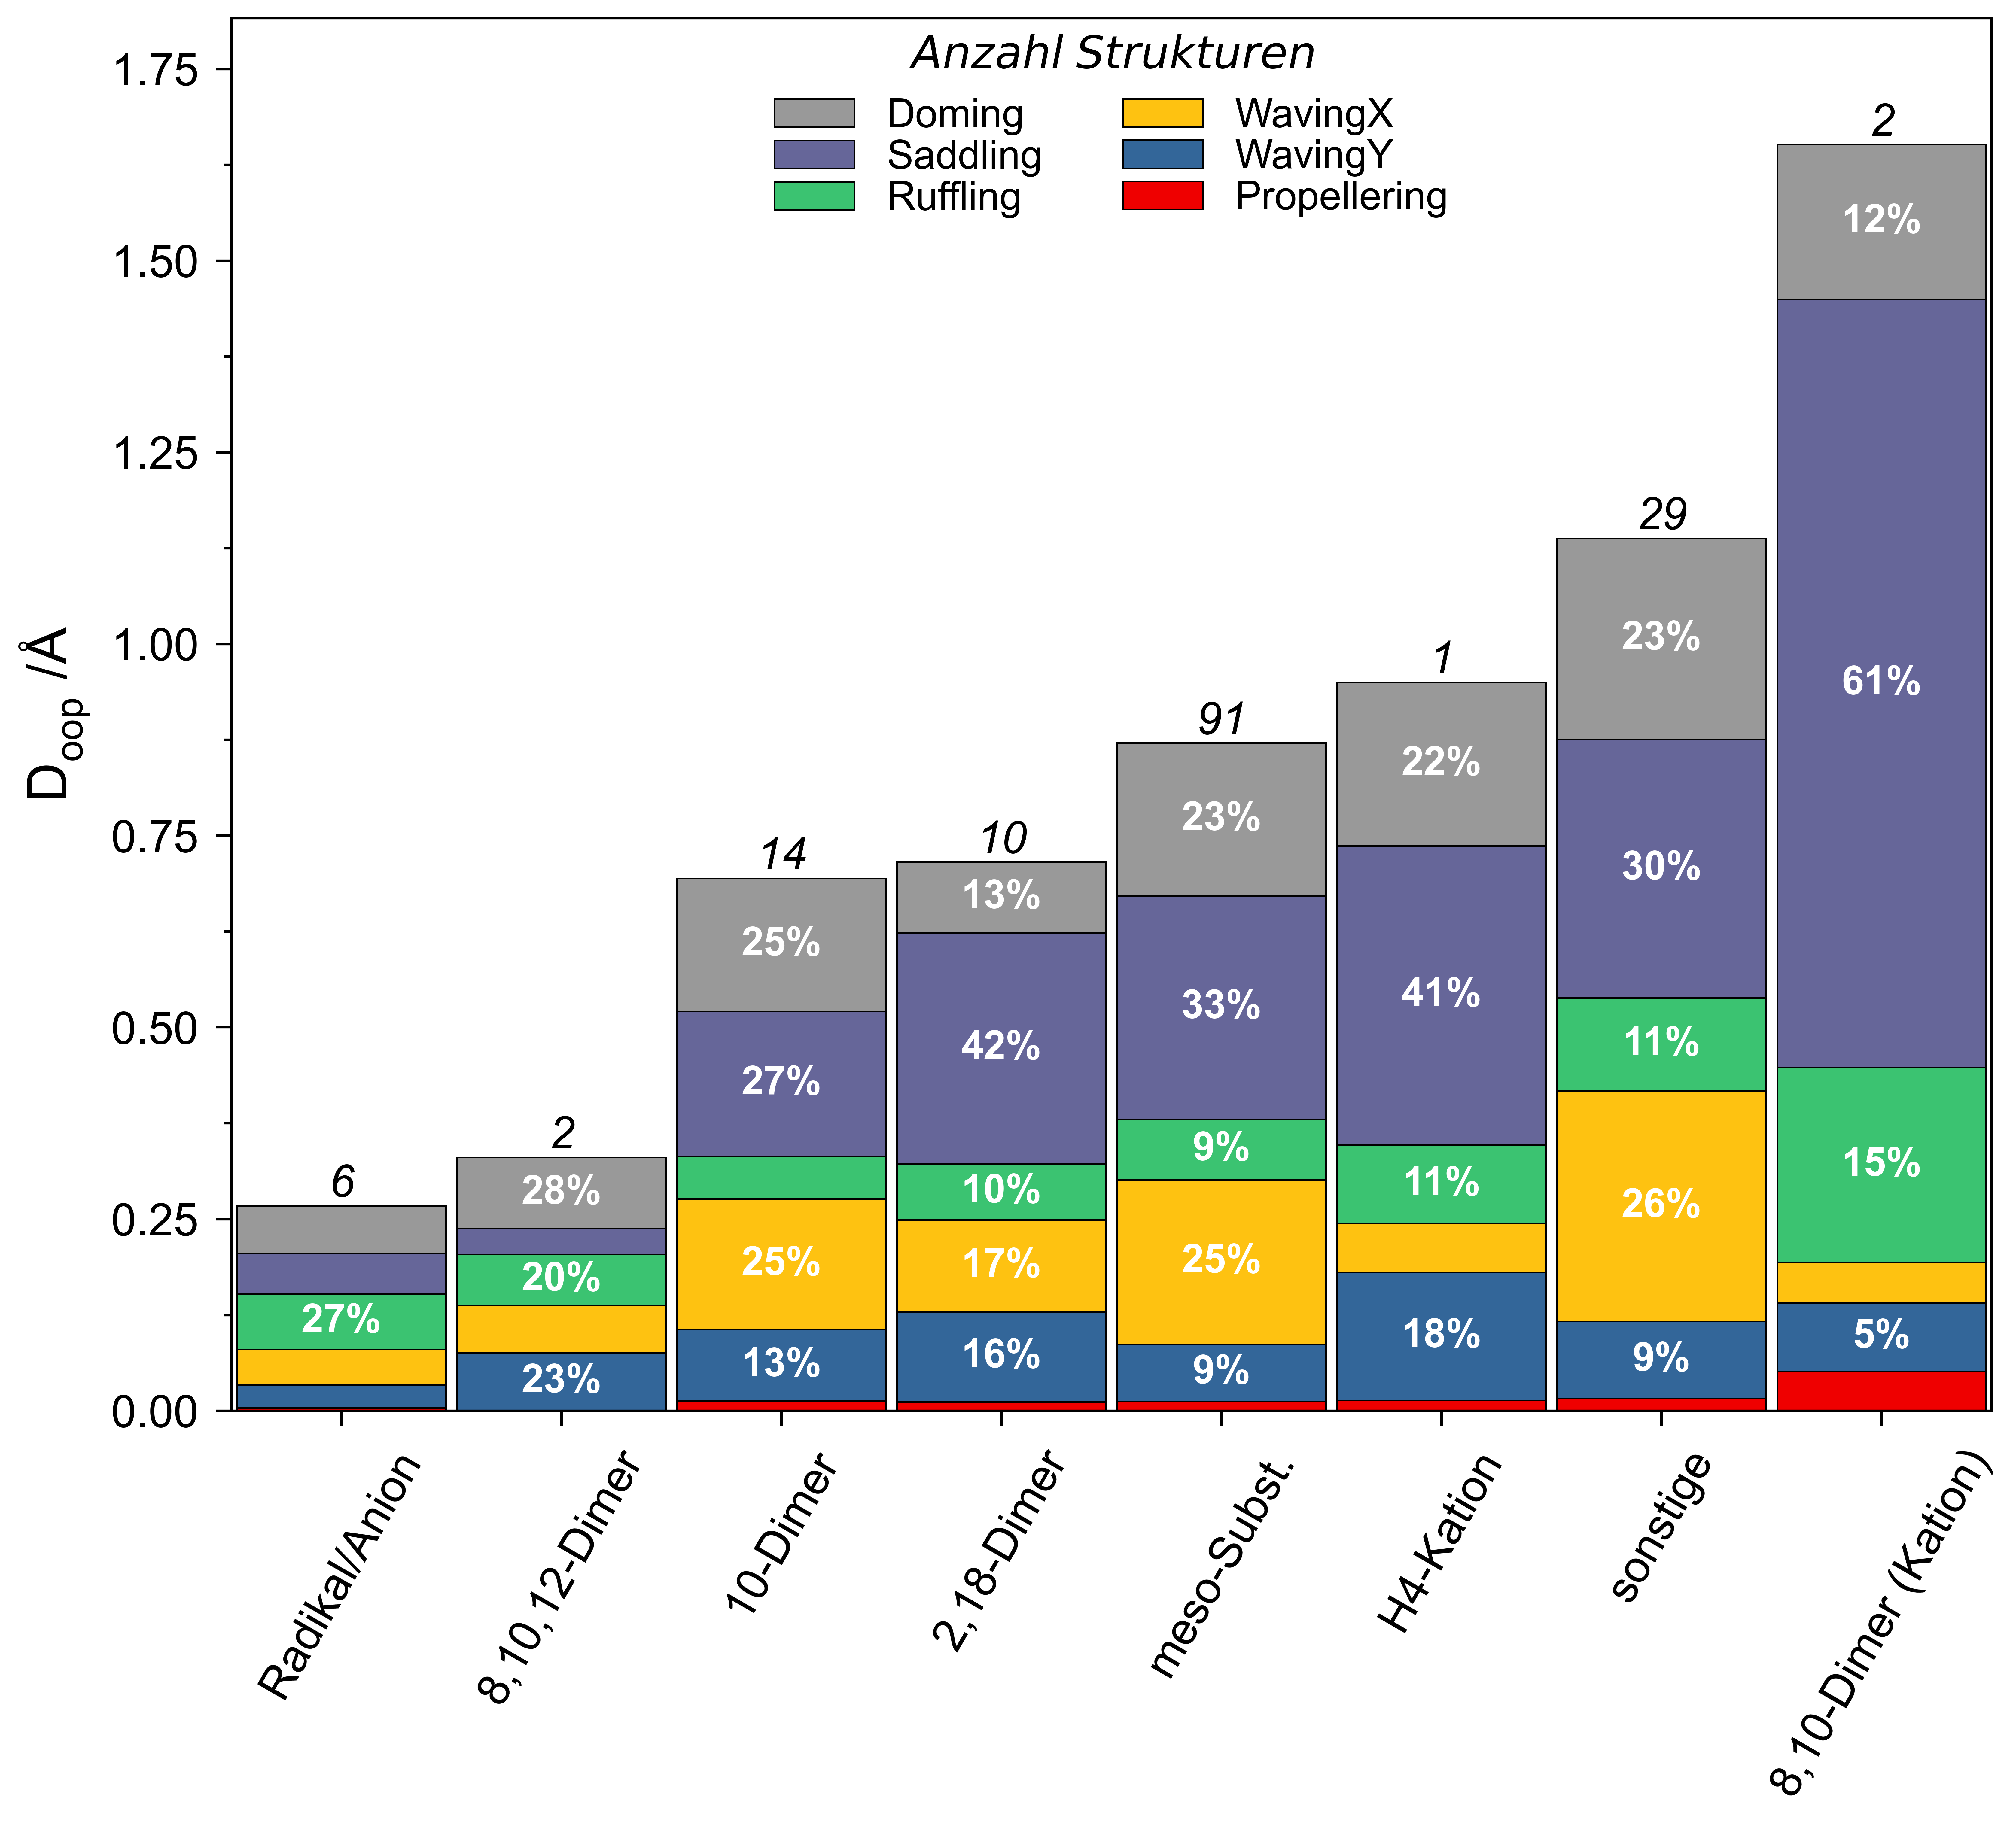

In [12]:
by = "Class"
from mathutil import groupBy
from plotutil import stackedbar
group = groupBy(freeBases, constants.percCompColumns, by)
group.sort_values("DoopExp", inplace=True)
stackedbar.plot(group, "", constants.compColumns, print_legend=True, ncol=2, tickRotation=60)
group.to_excel("out/freebase_group.xlsx")

In [1]:

m3d = periodictable.m3d.copy()
m4d = periodictable.m4d.copy()
m5d = periodictable.m5d.copy()
tm = dataset.loc[dataset["Metal"].isin(m3d+m4d+m5d)]
# tm = tm.loc[tm["Group"] != "11"]
# tm = tm.loc[dataset["Group"] != "11"]
tm["D"] = tm.apply(
    lambda x:
        3 if x["Metal"] in m3d
        else 4 if x["Metal"] in m4d
        else 5 if x["Metal"] in m5d
        else "sonstige",
        axis=1
)
tm["cn"] = tm.apply(
    lambda x:
        "4" if x["CoordNo"] == 4 and x["Metal"] != "Cu"
        else "Gruppe\ 11" if x["CoordNo"] == 4
        else x["CoordNo"] if x["CoordNo"] < 7
        else "sonstige",
        axis=1
)
aa = tm
cn = ["4", "Gruppe\ 11", 5, 6, "sonstige"]
tm["M2N4"] = np.abs(tm["MetalToN4"])
groups = [4, "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"]
ms = ["Co", "Ni", "Cu"]
ridgeline.plot(tm, groups, "Group", "DoopExp", constants.doop_axis_label, (-.1, 2.5), (0, 4), constants.colors_min + constants.colors_ext + constants.colors_additional)
# print(len(tm.loc[tm["D"] == 5]))


NameError: name 'periodictable' is not defined

C:\Users\jenso\AppData\Local\Temp/ipykernel_5160/1794071348.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\jenso\Documents\Projects\porphystruct-scripts\plotutil\ridgeline.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


(<Figure size 7559.06x6141.73 with 3 Axes>,
 [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>])

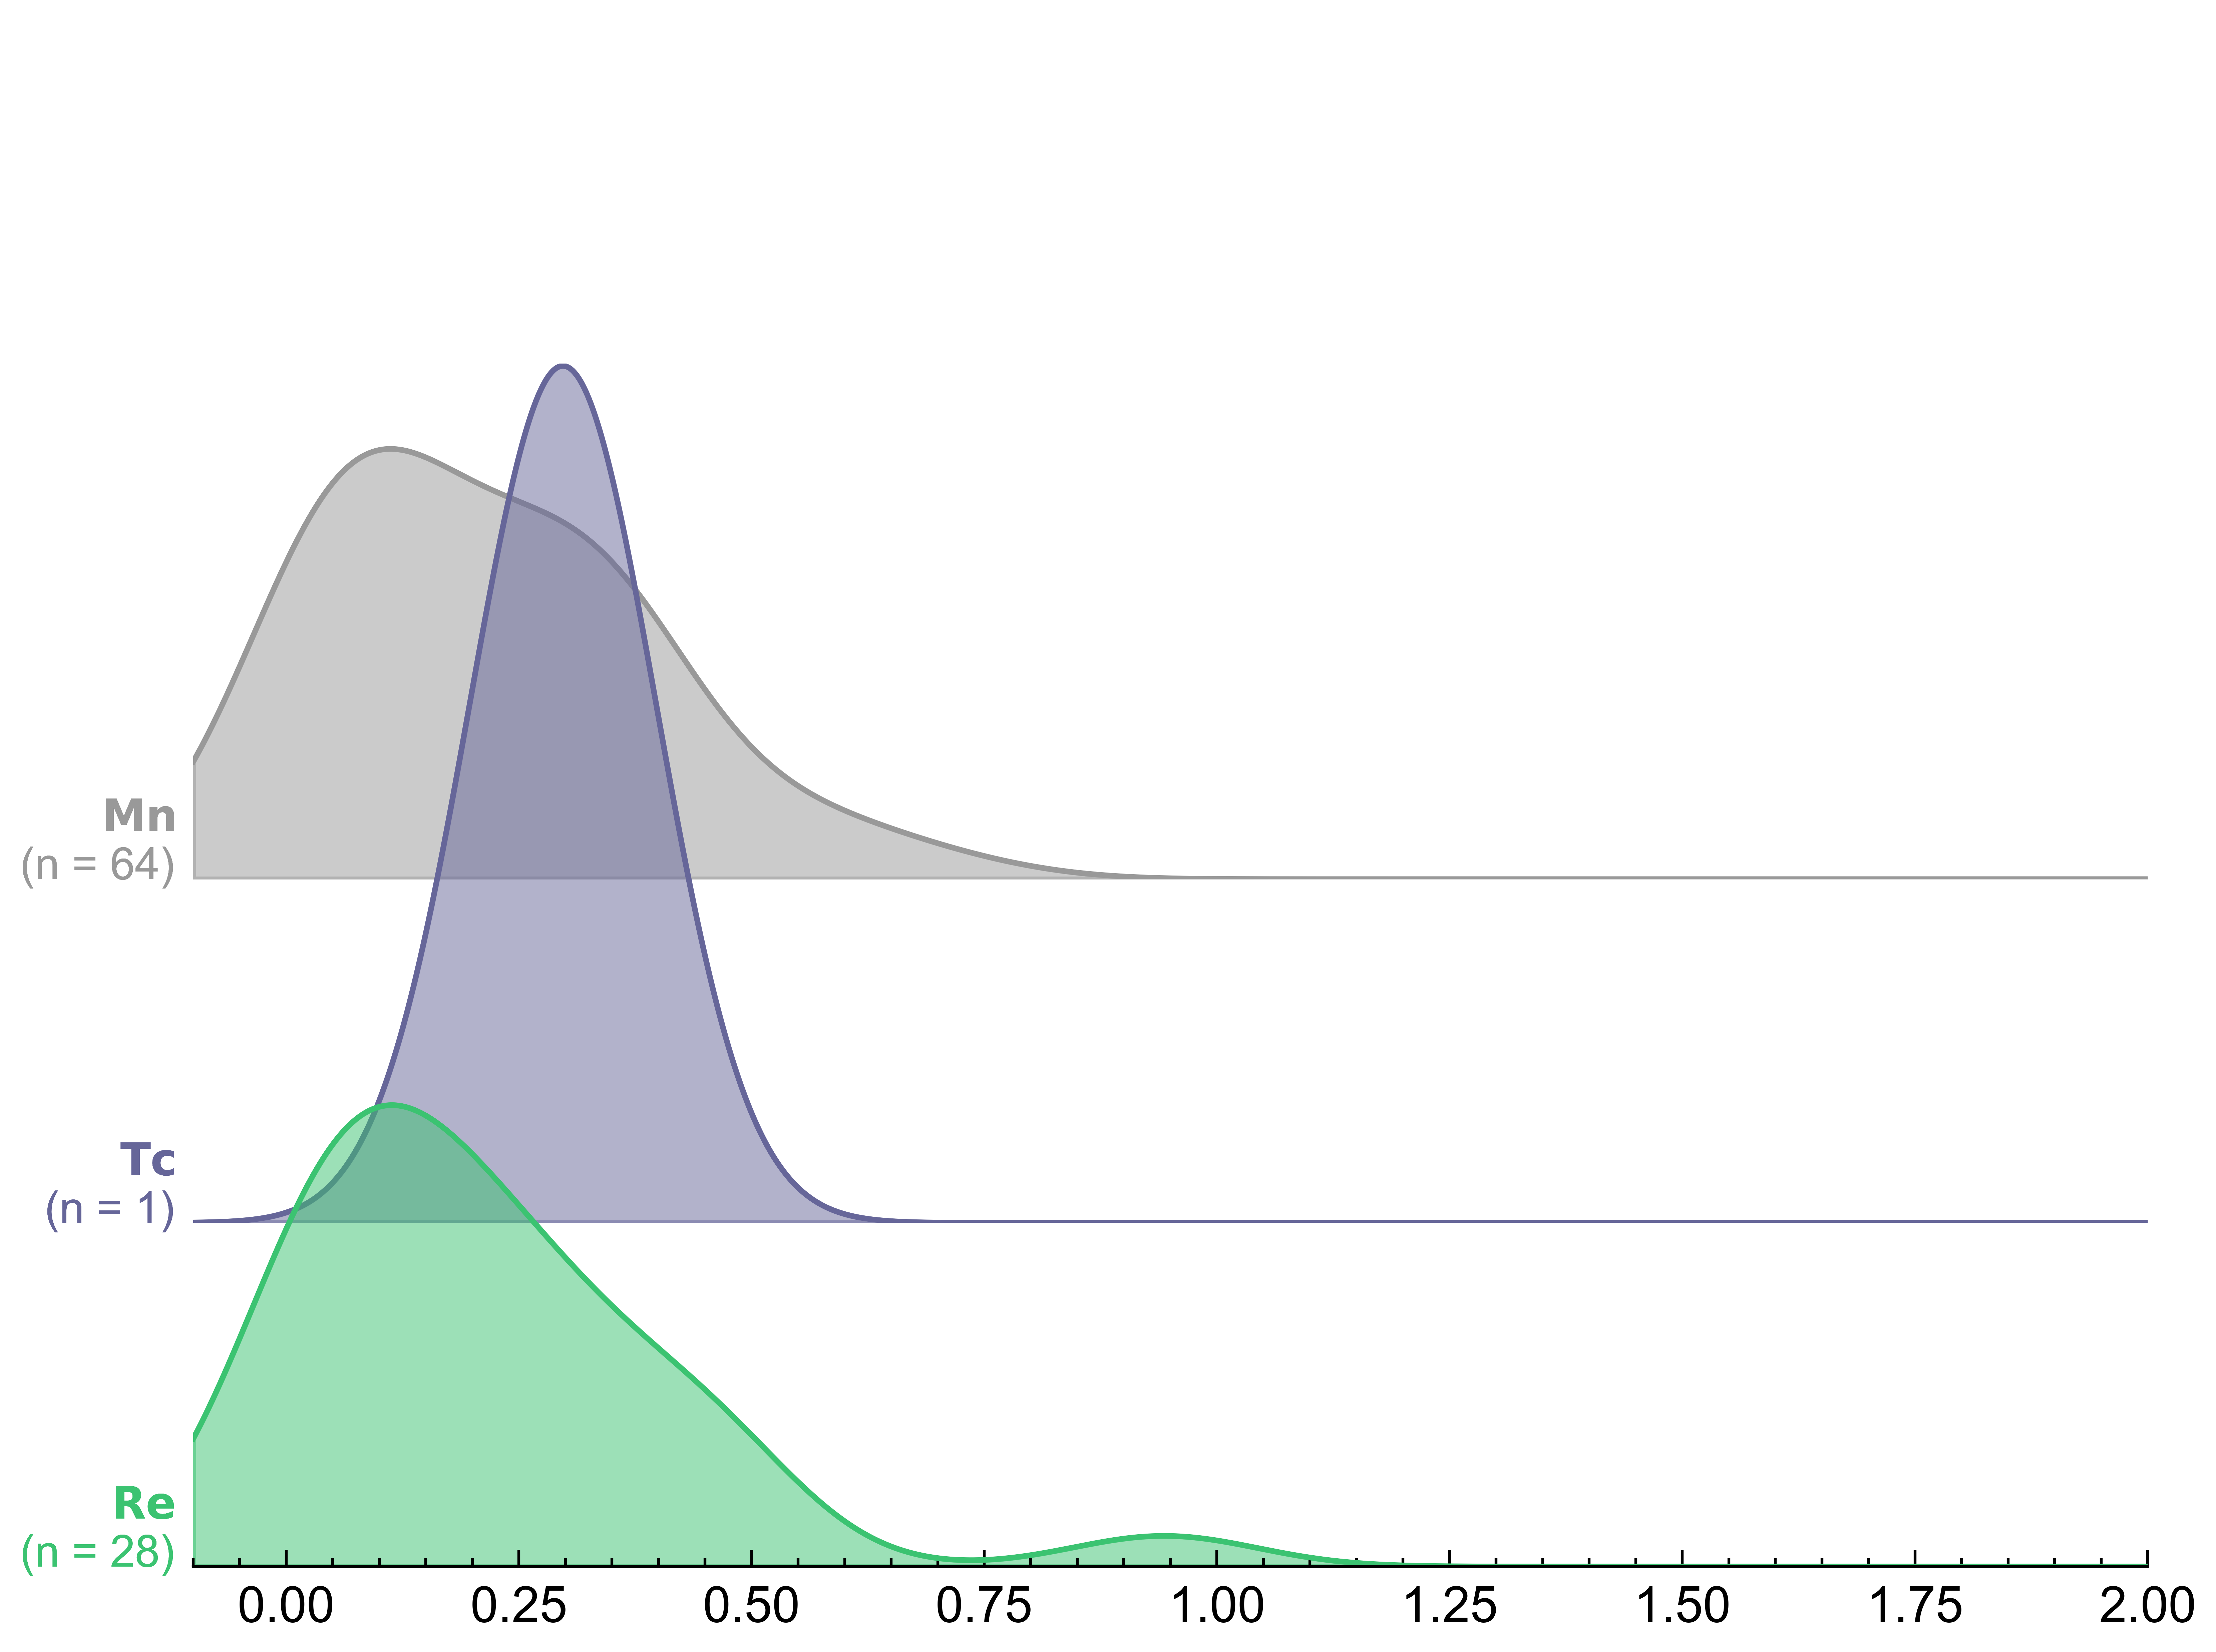

In [ ]:
le_group = ["Mn", "Tc", "Re"]
dataset["x"] = np.abs(dataset["Saddling1"])
ridgeline.plot(dataset, le_group, "Metal", "x", "",(-.1, 2), (0, 4), constants.colors_min + constants.colors_ext + constants.colors_additional)

C:\Users\jenso\AppData\Local\Temp/ipykernel_5160/3838125916.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\jenso\Documents\Projects\porphystruct-scripts\plotutil\ridgeline.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


(<Figure size 7559.06x6141.73 with 1 Axes>,
 [<AxesSubplot:xlabel='|Saddling1| /Å'>])

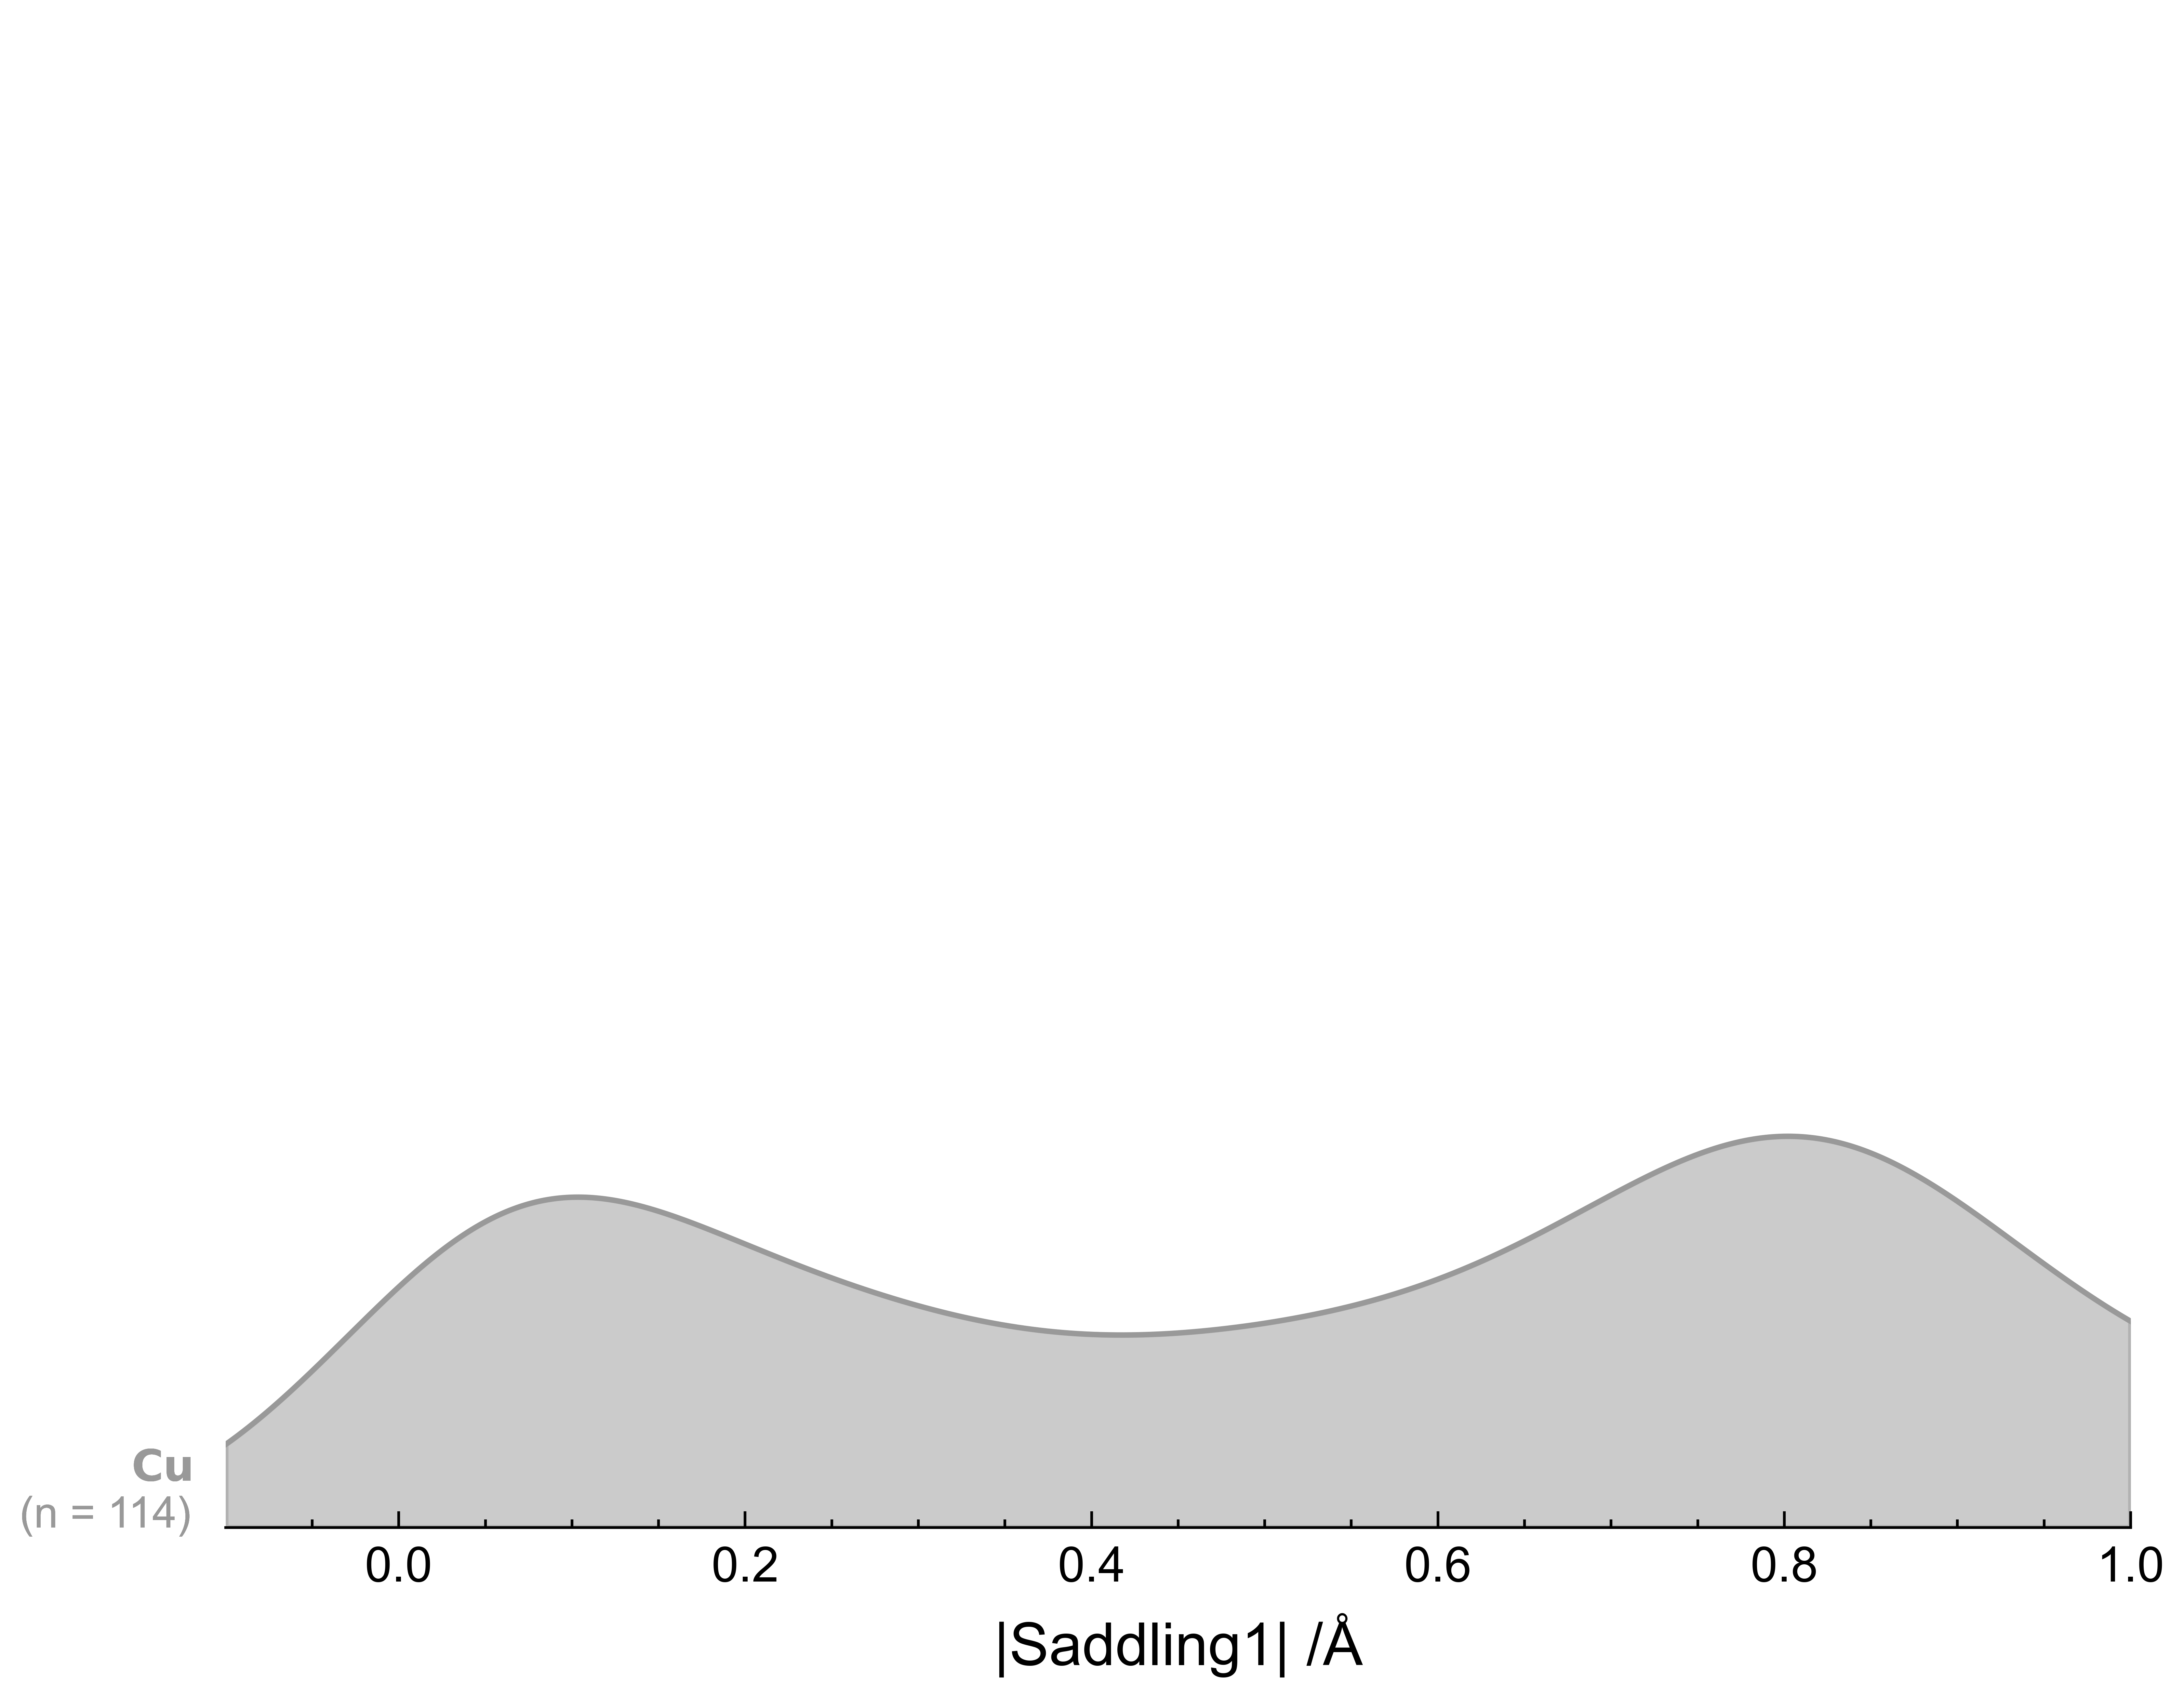

In [ ]:
le_group = ["Cu"]#, "Tc", "Re"]
data_group = dataset.loc[dataset["Metal"].isin(le_group)]
iv = ["Cl", "OH", "I", "Br", "Ph", "Br-Ph"]
v = ["O", "N", "NMes"]
data_group["x"] = np.abs(dataset["Saddling1"])
# data_group["Ox"] = data_group.apply(
#     lambda x: 
#     "+IV_{Cl, Br, Br-Ph}" if x["AxialLigand"]  in ["Cl", "Br-Ph", "Br"]
#     else "+V" if x["AxialLigand"] in v
#     else "+IV_{I, OH, Ph}" if x["AxialLigand"] in iv 
#     else "+III"
#     ,axis=1)
# ox = ["+III", "+IV_{Cl, Br, Br-Ph}", "+IV_{I, OH, Ph}", "+V"]

ridgeline.plot(data_group, le_group, "Metal", "x", "|Saddling1| /Å",(-.1, 1), (0, 4), constants.colors_min + constants.colors_ext + constants.colors_additional)

C:\Users\jenso\AppData\Local\Temp/ipykernel_5160/2017400723.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jenso\AppData\Local\Temp/ipykernel_5160/2017400723.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\jenso\Documents\Projects\porphystruct-scripts\plotutil\ridgeline.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


(<Figure size 7559.06x6141.73 with 4 Axes>,
 [<AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:xlabel='|Saddling1| /Å'>])

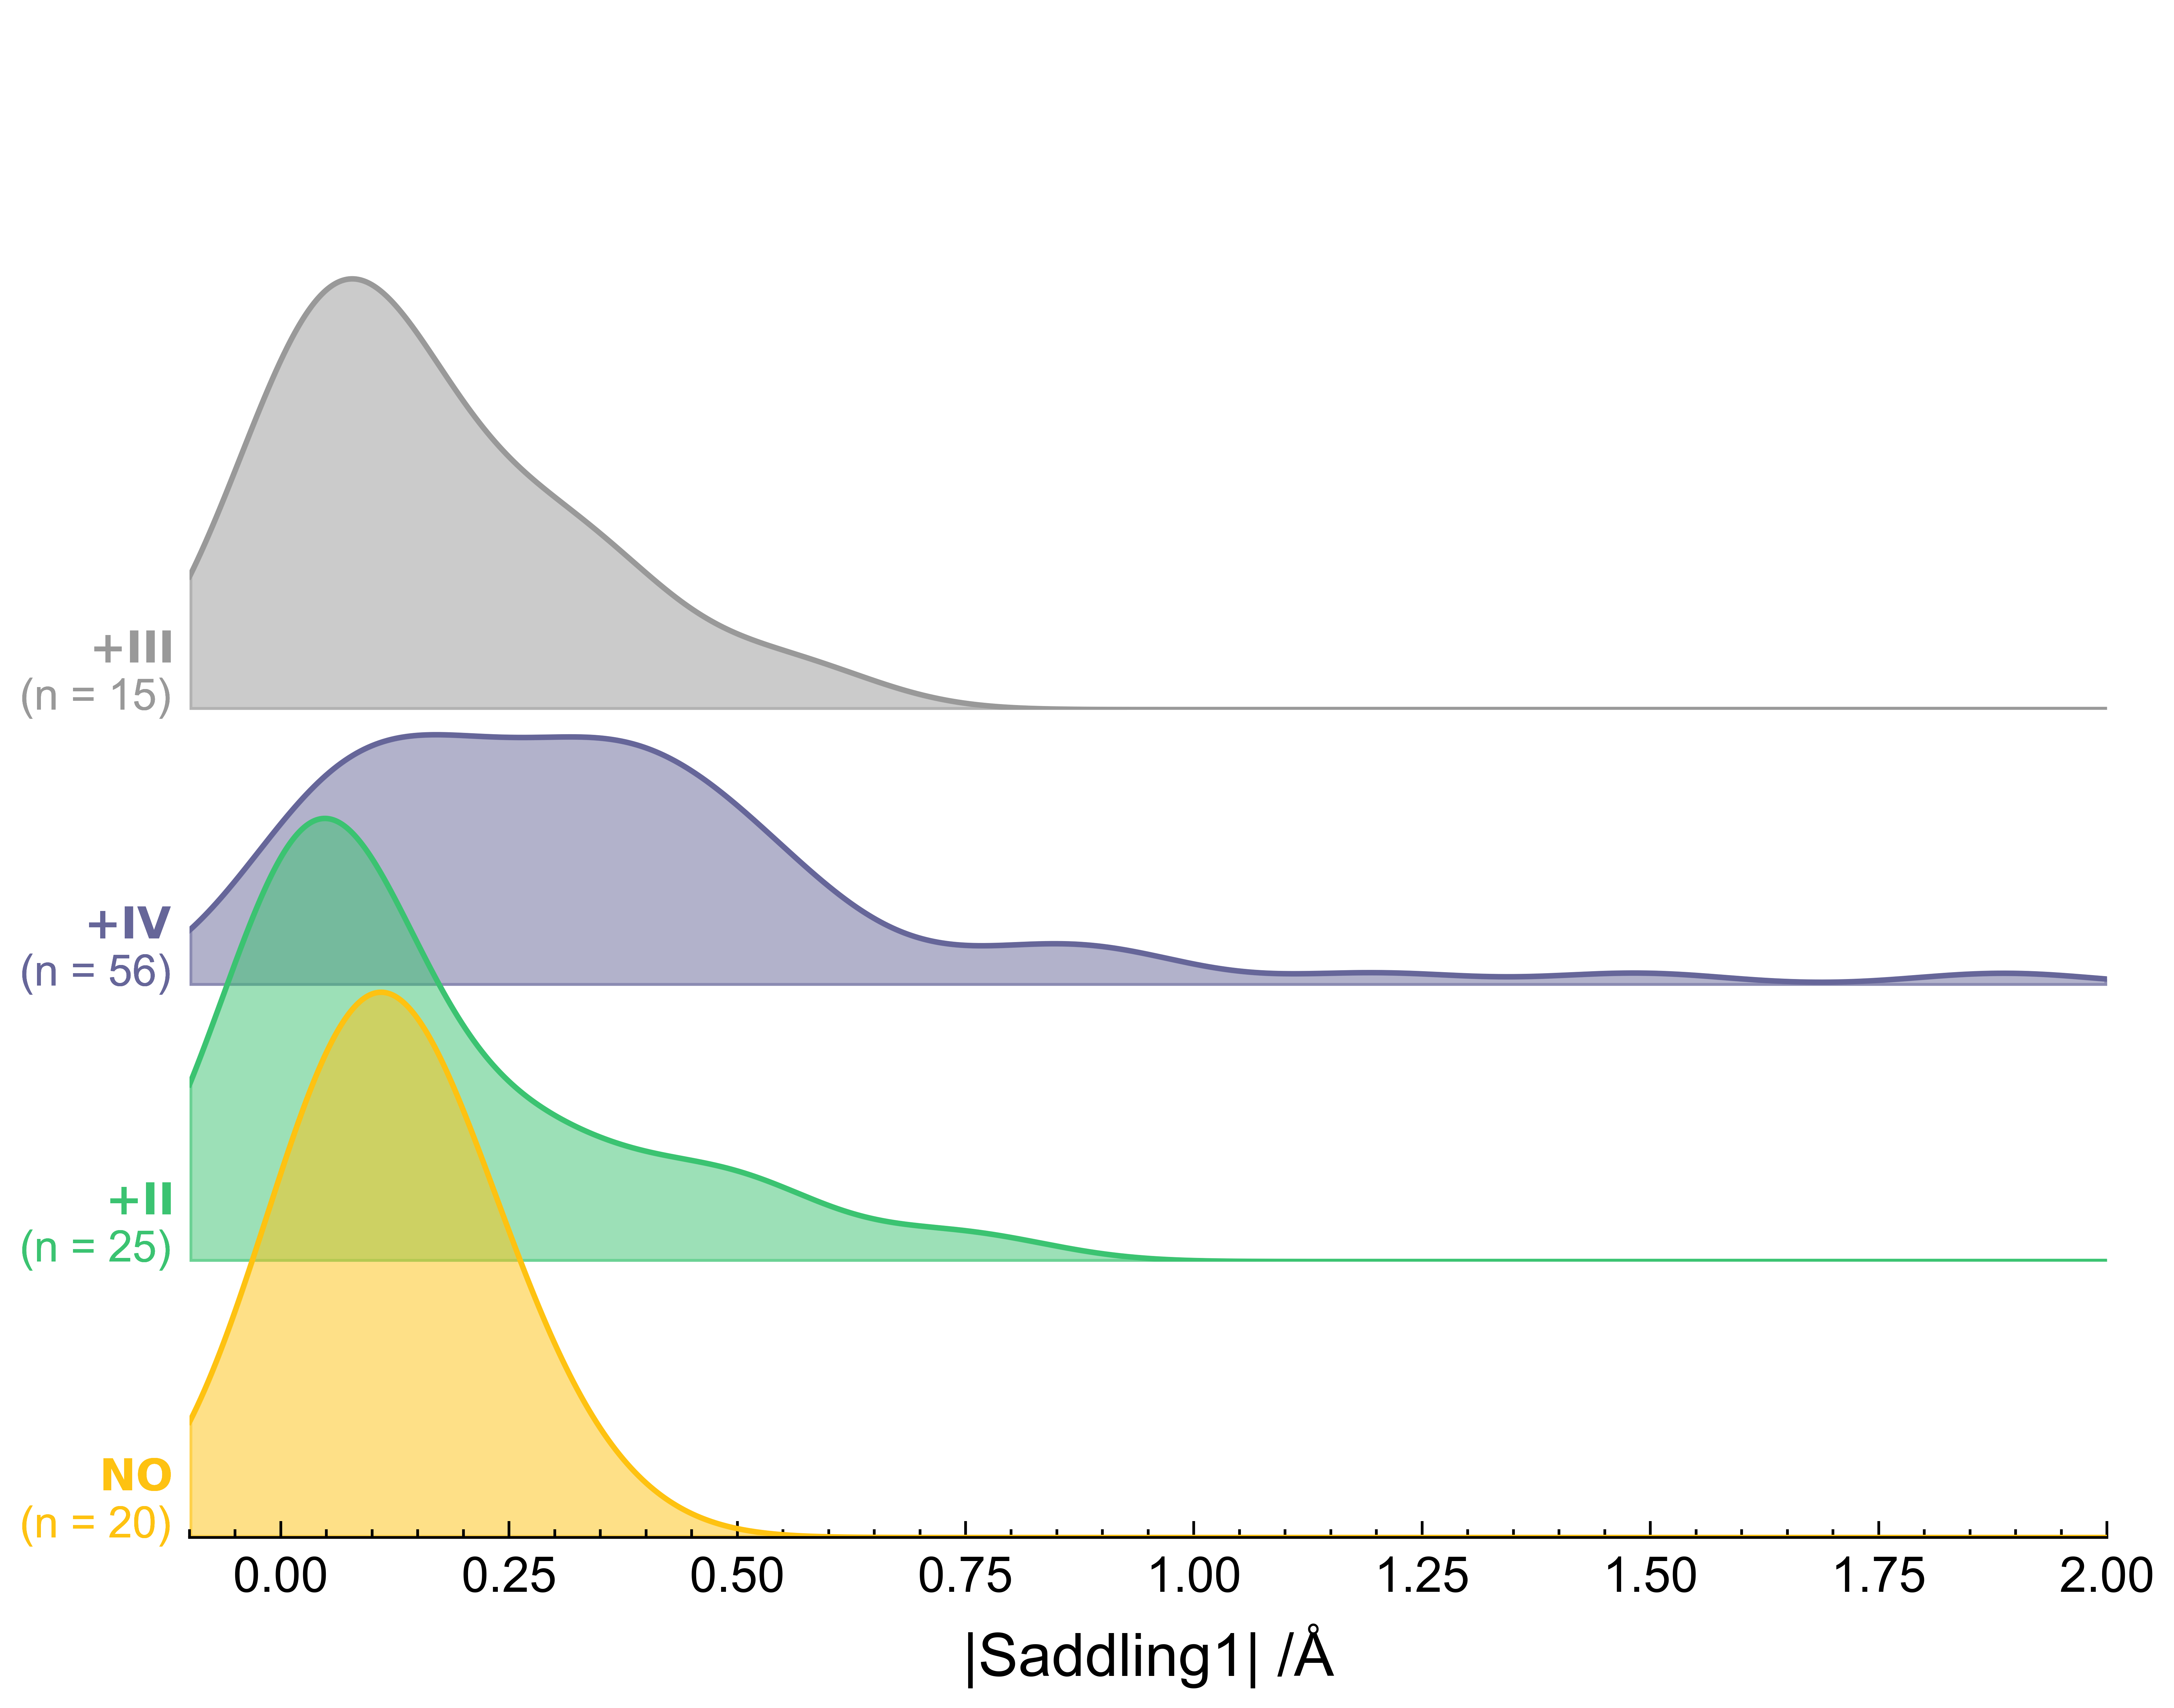

In [ ]:
le_group = ["Fe"]#, "Tc", "Re"]data_group = dataset.loc[dataset["Metal"].isin(le_group)]
iv = ["Cl", "Me", "Ph", "OH", "μ-O", "F", "Triflate"]
iii = ["H2O", "Py", "Py2", "(Py)2", "MeCN"]
data_group = dataset.loc[dataset["Metal"].isin(le_group)]
data_group["Ox"] = data_group.apply(
    lambda x: 
    "+III" if x["AxialLigand"] in iii
    else "+IV" if x["AxialLigand"] in iv 
    else "NO" if x["AxialLigand"] == "NO"
    else "+II" 
    ,axis=1)
    
data_group["x"] = np.abs(dataset["Saddling1"])
ox = ["+III", "+IV", "+II", "NO"]
ridgeline.plot(data_group, ox, "Ox", "x", "|Saddling1| /Å",(-.1, 2), (0, 4), constants.colors_min + constants.colors_ext + constants.colors_additional)

c:\Users\jenso\Documents\Projects\porphystruct-scripts\data\datautil.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\jenso\Documents\Projects\porphystruct-scripts\data\datautil.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\jenso\Documents\Projects\porphystruct-scripts\plotutil\ridgeline.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


(<Figure size 7559.06x6141.73 with 7 Axes>,
 [<AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:xlabel='$\\mathregular{D_{oop}}$ /Å'>])

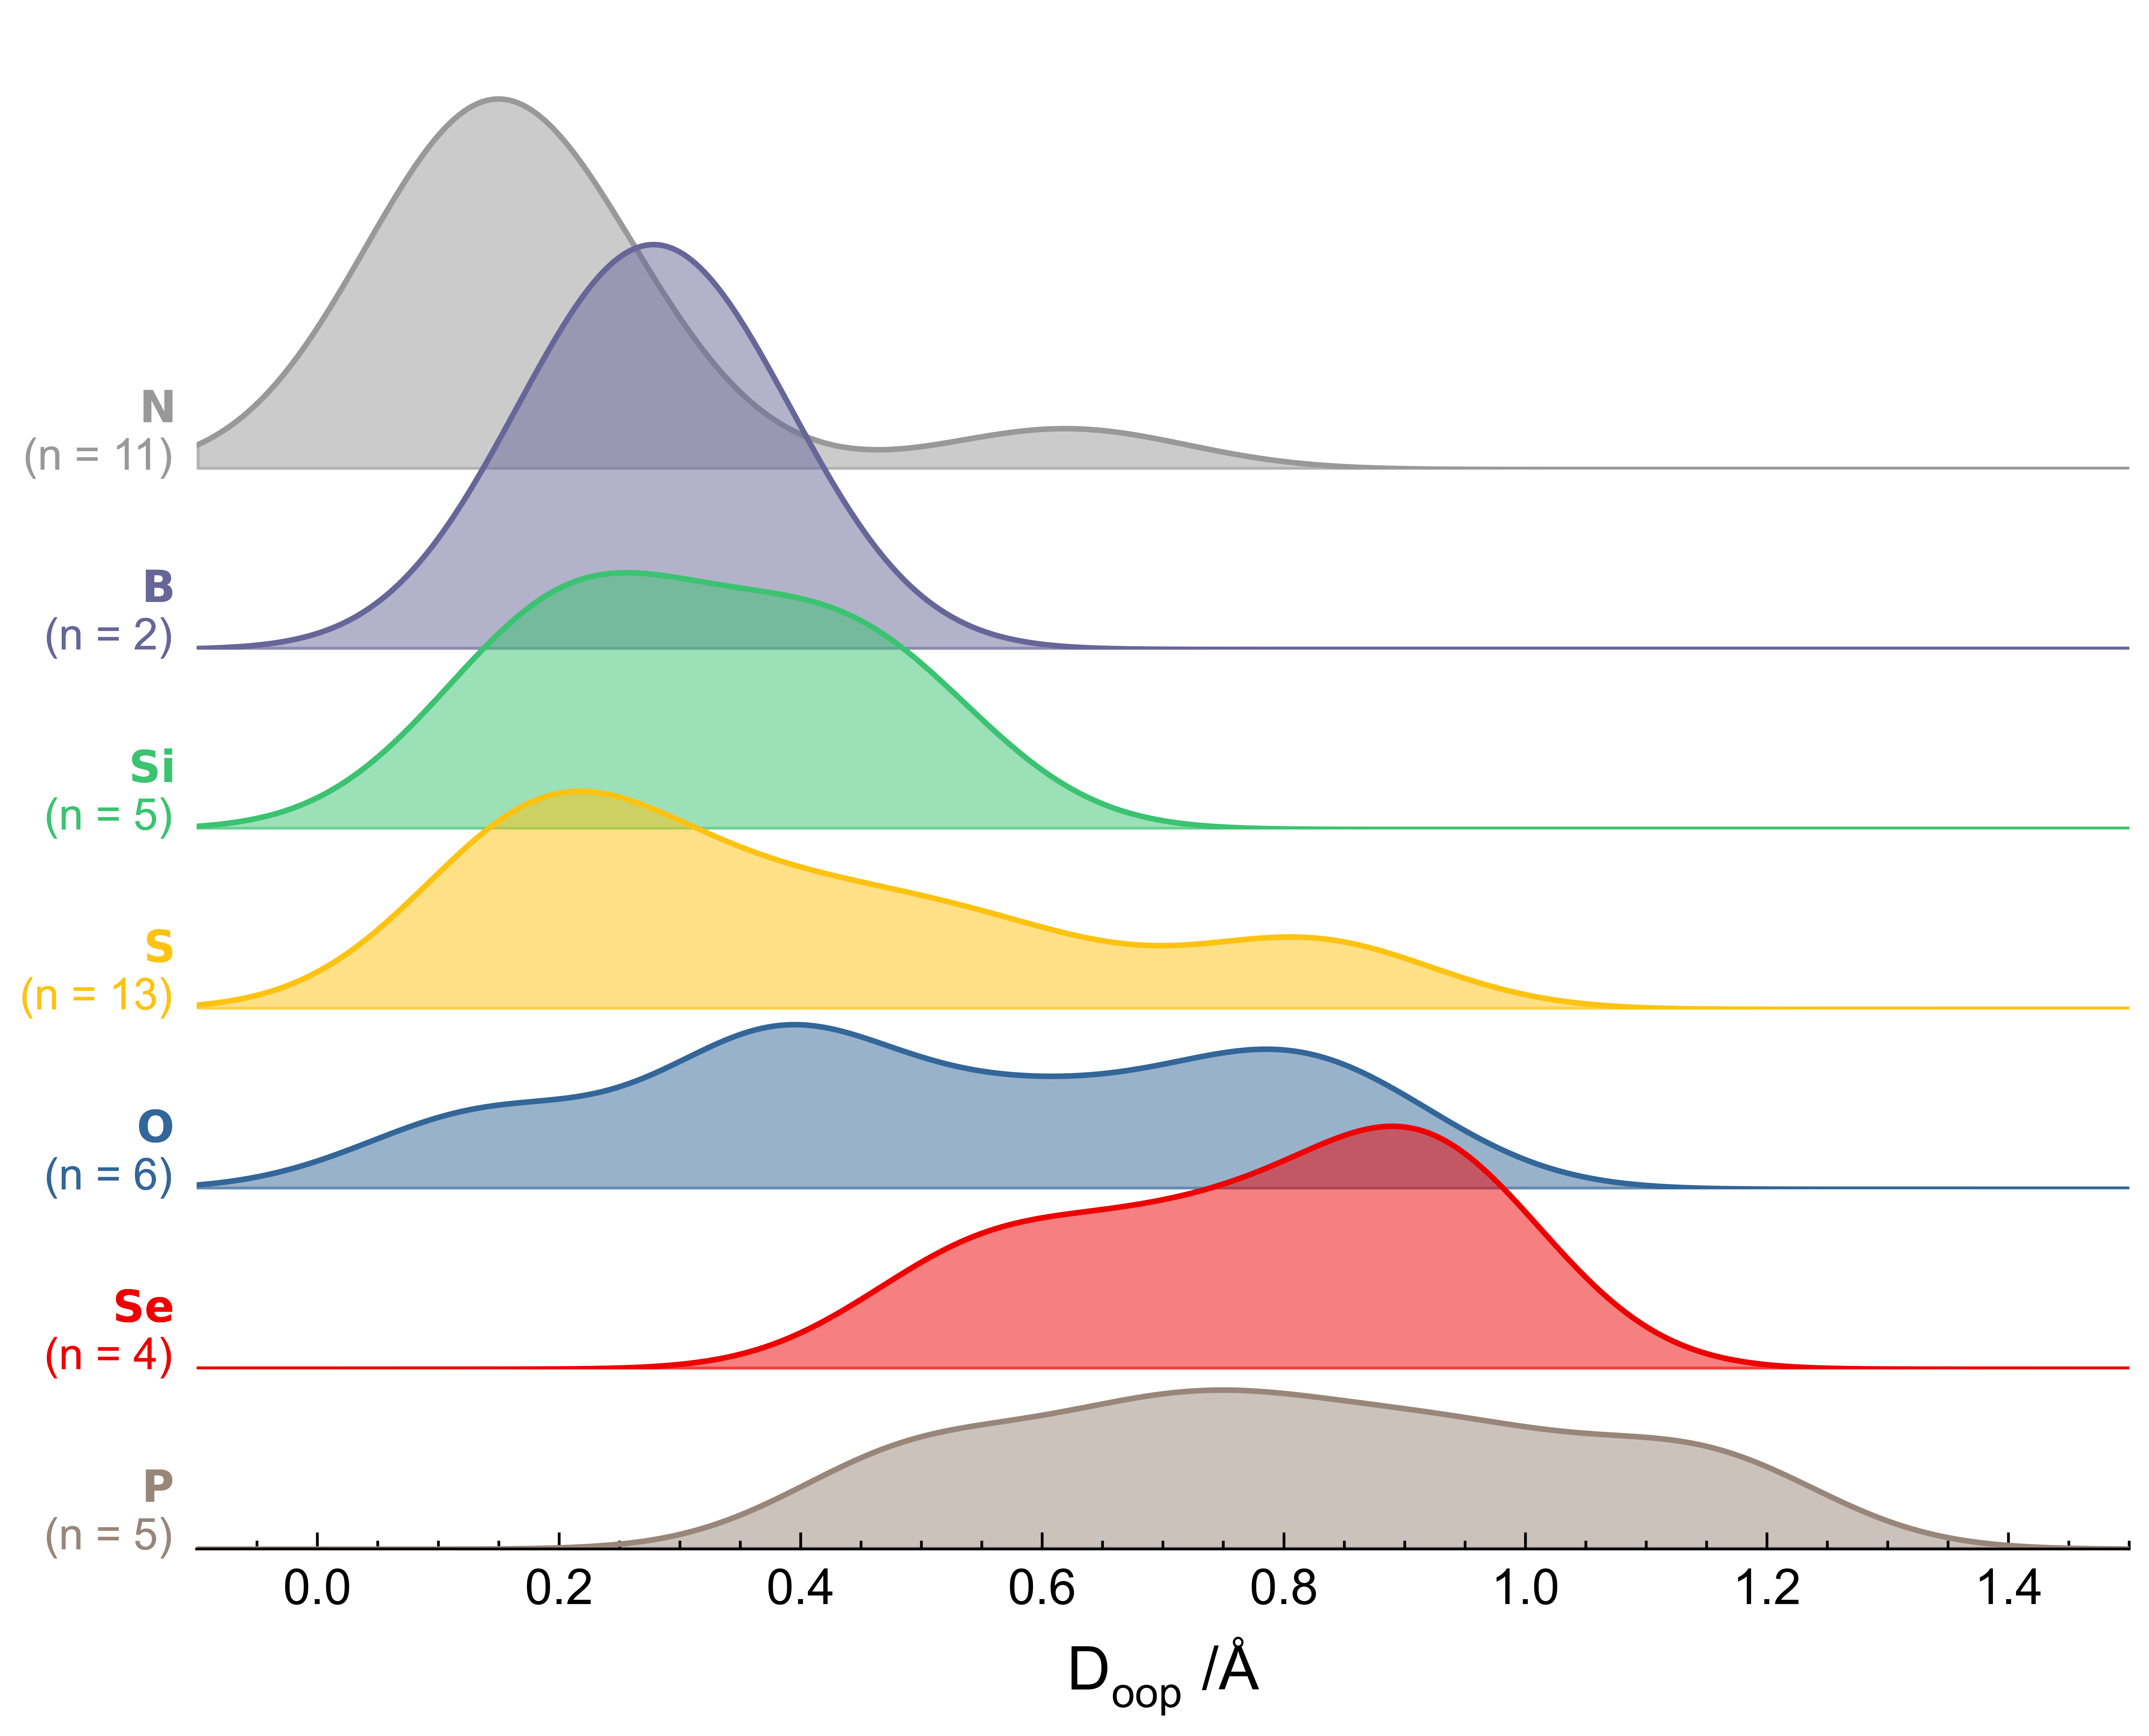

In [ ]:
from data import datautil

data_hic = datautil.applyHICSubclass(dataset)
data_hic = datautil.getHeteroAtom(data_hic)
data_hic = data_hic.loc[data_hic["Subclass"] == "10-Heterocorrole"]
ridgeline.plot(data_hic, ["N", "B", "Si", "S", "O", "Se", "P"], "Heteroatom", "DoopExp", constants.doop_axis_label,(-.1, 1.5), (0, 4), constants.colors_min + constants.colors_ext + constants.colors_additional)